**PRAKTIKUM**

1. Buka https://colab.research.google.com/, pilih tab Github dan pastikan repository yang terpilih ada repository yang sama dengan praktikum pada minggu pertama dan kedua.



> Lanjutkan dengan membuat notebook baru dan ubah nama file menjadi “Week3.ipynb”. Perhatian: Jangan lupa untuk menyimpan salinan ke Github setelah melakukan perubahan / ketika Anda sudah selesai melakukan praktikum.



2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


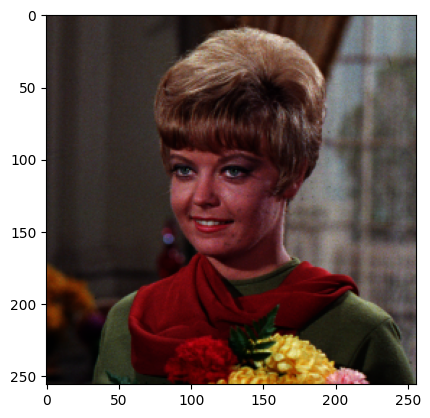

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/sample_data/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan transformasi linier brightness adalah sebagai berikut:

> > > > > > > g(x, y) = f(x, y) + b

> Dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness. Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google colab:

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


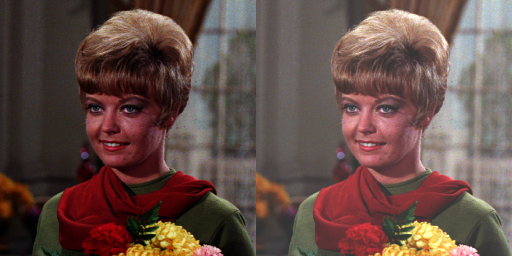

In [4]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/sample_data/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

> Dari potongan kode di atas dapat dilihat bahwa ketika dijalankan, system akan menampilkan text field untuk memasukkan konstanta nilai brightness yang diinginkan, dan akan disimpan pada variabel brightness. Kemudian ditentukan citra pada drive yang akan diolah dan ditampung di variabel original. Tahap selanjutnya adalah mengakses pixel citra masukan dengan 3 perulangan. Perulangan pertama dilakukan pada shape[0] untuk tinggi citra, perulangan kedua dilakukan pada shape[1] untuk lebar citra, dan perulangan ketiga dilakukan pada shape[2] yang merupakan channel warna pada citra. Setelah melakukan 3 perulangan, dilakukan transformasi linier brightness dengan cara menambahkan nilai brightness pada citra masukan.

***TUGAS PRAKTIKUM***

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

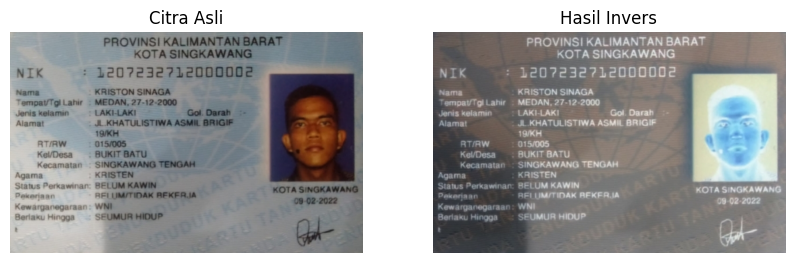

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra masukan
input_image = cv2.imread('/content/sample_data/KTP1.jpg')

# Invers citra dengan rumus g(x) = 255 - f(x)
inverted_image = 255 - input_image

# Tampilkan citra asli dan hasil invers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hasil Invers')
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255] : 50
Masukkan kontras [1.0 - 3.0] : 2


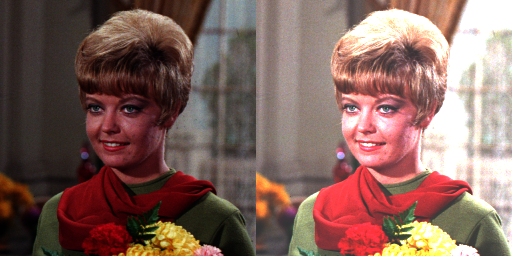

In [6]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/sample_data/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------
Masukkan tingkat kecerahan : 50


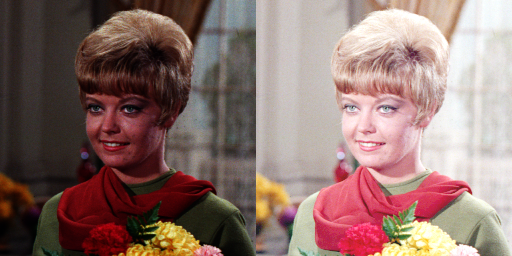

In [7]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan : '))
except ValueError:
  print('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

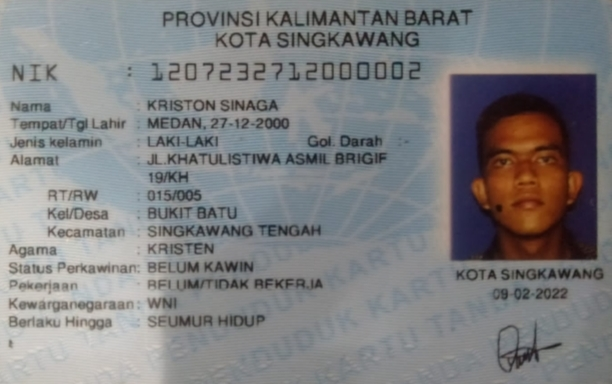

In [8]:
img2 = cv.imread('/content/sample_data/KTP1.jpg')
img_rgb = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
cv2_imshow(img2)

> a. Averaging

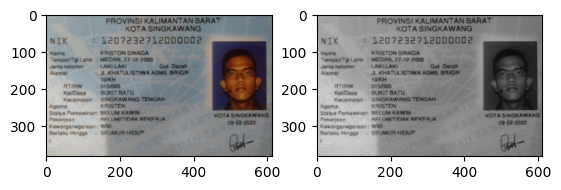

In [9]:
img_avg = cv.imread('/content/sample_data/KTP1.jpg')
img_avg[:] = img2.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

> b. Lightness

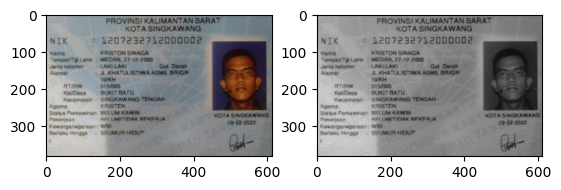

In [10]:
img_lgh = cv.imread('/content/sample_data/KTP1.jpg')
img_lgh[:] = np.max(img_lgh,axis=-1,keepdims=10)/2+np.min(img_lgh,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lgh)

> c. Luminance

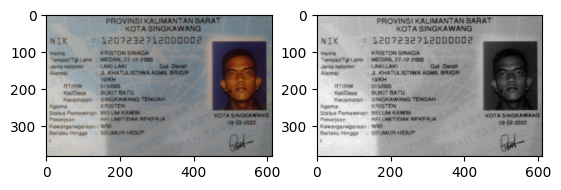

In [11]:
image_lmc = cv.imread('/content/sample_data/KTP1.jpg')
R, G, B = image_lmc[:,:,0], image_lmc[:,:,1], image_lmc[:,:,2]
gray_image_lmc = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lmc, cmap='gray')


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

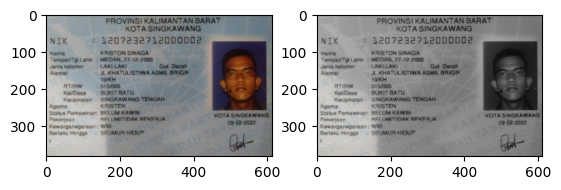

In [12]:
img_4 = img2.copy()

ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(img_rgb, mask3)
gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')

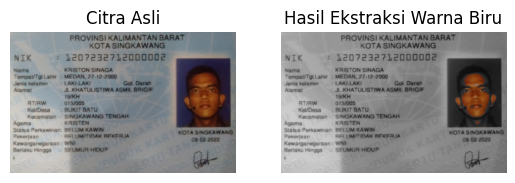

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra masukan
img_rgb = cv2.imread('/content/sample_data/KTP1.jpg')

# Salin citra untuk hasil akhir
img_4 = img_rgb.copy()

# Tentukan rentang warna biru dalam format BGR
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([100, 100, 255])

# Buat masker untuk warna biru
blue_mask = cv2.inRange(img_4, lower_blue, upper_blue)

# Ubah bagian yang bukan biru menjadi grayscale
gray = cv2.cvtColor(img_4, cv2.COLOR_BGR2GRAY)
img_4 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Gabungkan citra asli dengan citra biru yang diubah menjadi grayscale
img_4[blue_mask != 0] = img_rgb[blue_mask != 0]

# Tampilkan citra asli dan hasilnya
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
ax[0].set_title('Citra Asli')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB))
ax[1].set_title('Hasil Ekstraksi Warna Biru')
ax[1].axis('off')

plt.show()